In [1]:
# import pandas_datareader as pdr

In [2]:
# df=pdr.get_data_tiingo('AAPL',api_key='2d8e2696f1e0cede39e3a0ed42335fb9c3e844bb')

In [3]:
# df.to_csv('AAPL.csv')

In [4]:
import pandas as pd
import  numpy as np
import math

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2018-08-20 00:00:00+00:00,215.46,219.18,215.11,218.10,30287695,51.584538,52.475165,51.500742,52.216596,121150780,0.0,1.0
1,1,AAPL,2018-08-21 00:00:00+00:00,215.04,217.19,214.03,216.80,26159755,51.483983,51.998727,51.242173,51.905355,104639020,0.0,1.0
2,2,AAPL,2018-08-22 00:00:00+00:00,215.05,216.36,213.84,214.10,19018131,51.486377,51.800012,51.196684,51.258932,76072524,0.0,1.0
3,3,AAPL,2018-08-23 00:00:00+00:00,215.49,217.05,214.60,214.65,18883224,51.591720,51.965209,51.378640,51.390611,75532896,0.0,1.0
4,4,AAPL,2018-08-24 00:00:00+00:00,216.16,216.90,215.11,216.60,18476356,51.752129,51.929297,51.500742,51.857472,73905424,0.0,1.0


In [7]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2023-08-14 00:00:00+00:00,179.46,179.6900,177.305,177.97,43675627,179.46,179.6900,177.305,177.97,43675627,0.0,1.0
1254,1254,AAPL,2023-08-15 00:00:00+00:00,177.45,179.4800,177.050,178.88,43622593,177.45,179.4800,177.050,178.88,43622593,0.0,1.0
1255,1255,AAPL,2023-08-16 00:00:00+00:00,176.57,178.5400,176.500,177.13,46964857,176.57,178.5400,176.500,177.13,46964857,0.0,1.0
1256,1256,AAPL,2023-08-17 00:00:00+00:00,174.00,177.5054,173.480,177.14,66062882,174.00,177.5054,173.480,177.14,66062882,0.0,1.0
1257,1257,AAPL,2023-08-18 00:00:00+00:00,174.49,175.1000,171.960,172.30,61172150,174.49,175.1000,171.960,172.30,61172150,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       215.46
1       215.04
2       215.05
3       215.49
4       216.16
         ...  
1253    179.46
1254    177.45
1255    176.57
1256    174.00
1257    174.49
Name: close, Length: 1258, dtype: float64

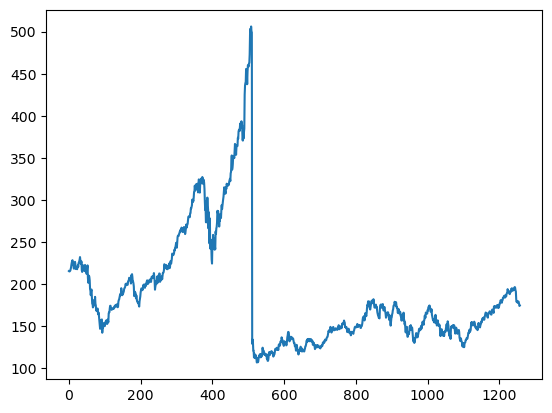

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
df1.shape

(1258,)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.27206011]
 [0.27100814]
 [0.27103319]
 ...
 [0.17465247]
 [0.1682154 ]
 [0.16944271]]


In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:,:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [18]:
print(X_train)

[[0.27206011 0.27100814 0.27103319 ... 0.11639324 0.11762054 0.11383845]
 [0.27100814 0.27103319 0.27213525 ... 0.11762054 0.11383845 0.10810269]
 [0.27103319 0.27213525 0.2738134  ... 0.11383845 0.10810269 0.11579211]
 ...
 [0.06376957 0.06797746 0.06727614 ... 0.1113087  0.10920476 0.1101315 ]
 [0.06797746 0.06727614 0.06654978 ... 0.10920476 0.1101315  0.10289292]
 [0.06727614 0.06654978 0.06579837 ... 0.1101315  0.10289292 0.10276769]]


In [19]:
print(X_train.shape)

(716, 100)


In [20]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

2023-09-04 15:48:48.658828: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 15:48:48.719274: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-04 15:48:48.720089: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 15:48:49.521263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 207ms/step - loss: 0.0296 - val_loss: 6.5739e-04
Epoch 2/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0131 - val_loss: 0.0026
Epoch 3/100
12/12 [==============================] - 1s 105ms/step - loss: 0.0096 - val_loss: 4.6211e-04
Epoch 4/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0086 - val_loss: 3.0929e-04
Epoch 5/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0076 - val_loss: 0.0013
Epoch 6/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0066 - val_loss: 9.8116e-04
Epoch 7/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0056 - val_loss: 2.7224e-04
Epoch 8/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0065 - val_loss: 3.6513e-04
Epoch 9/100
12/12 [==============================] - 1s 105ms/step - loss: 0.0057 - val_loss: 3.4661e-04
Epoch 10/100
12/12 [==============================] - 1s 102ms/

In [31]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 23ms/step


In [32]:
#transforming into original one
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [27]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

224.70118381323653

In [28]:
math.sqrt(mean_squared_error(y_test,test_predict))

161.79430719483483

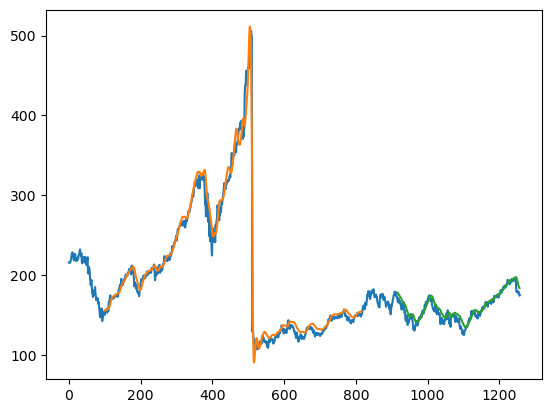

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Predicting the future 30 days output

In [35]:
len(test_data)

441

In [51]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
temp_input

[0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,


In [54]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.18693303]
101
1 day input [0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521
 0.21162179 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446
 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024
 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292
 0.22444584 0.22232937 0.21475266 

In [55]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [56]:
import matplotlib.pyplot as plt

In [57]:
len(df1)

1258

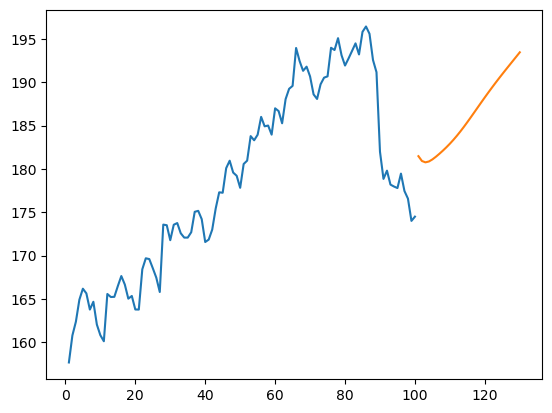

In [59]:
plt.plot(day_new,sc.inverse_transform(df1[1158:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

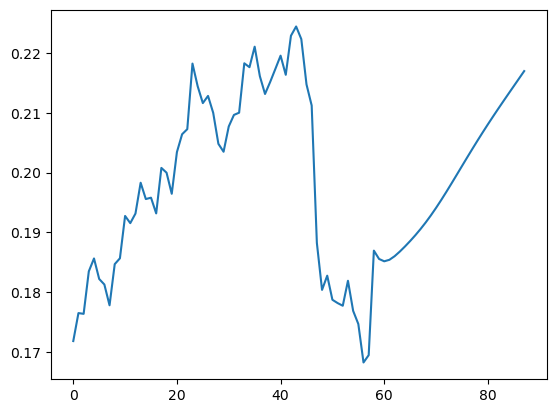

In [60]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [61]:
df3=sc.inverse_transform(df3).tolist()

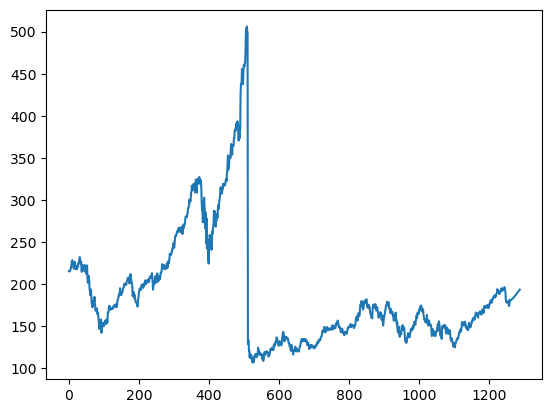

In [62]:
plt.plot(df3)